#**Градиентный бустинг для классификации. Контрольное задание**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели градиентного бустинга.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 251,
                           n_features = 4,
                           n_classes = 2,
                           n_informative = 4,
                           n_redundant = 0,
                           class_sep = 4.4,
                           n_clusters_per_class = 1,
                           random_state = 10)

Разделить выборку на тренировочную и тестовую.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 10,
                                                    test_size = 0.3)
X_train.shape, X_test.shape

((175, 4), (76, 4))

Произвести масштабирование значений признаков.

In [6]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.fit_transform(X_test)



# **2. Обучение модели с гиперпараметрами по умолчанию**

Обучить модель.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_default = GradientBoostingClassifier()

gb_default.fit(X_train, y_train)

GradientBoostingClassifier()

Оценить качество модели.

Построить матрицу ошибок.

In [18]:
from sklearn.metrics import confusion_matrix

y_pred_train = gb_default.predict(X_train)
y_pred_test = gb_default.predict(X_test)

print(f'На обучении: \n {confusion_matrix(y_train, y_pred_train)}')
print(f'На тесте: \n {confusion_matrix(y_test, y_pred_test)}')

На обучении: 
 [[94  0]
 [ 0 81]]
На тесте: 
 [[33  0]
 [ 1 42]]


Вывести отчет о классификации.

In [19]:
from sklearn.metrics import classification_report

print(f'На обучении: \n {classification_report(y_train, y_pred_train)}')
print(f'На тесте: \n {classification_report(y_test, y_pred_test)}')


На обучении: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        81

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

На тесте: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.98      0.99        43

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76



# **3. Подбор оптимальных гиперпараметров модели**

Осуществить подбор оптимальных гиперпараметров модели следующими способами:
- визуальный анализ зависимости метрик качества гиперпараметров на обучающей и тестовой выборках;
- визуальный анализ валидационных кривых;
- поиск на сетке.

**learning_rate**

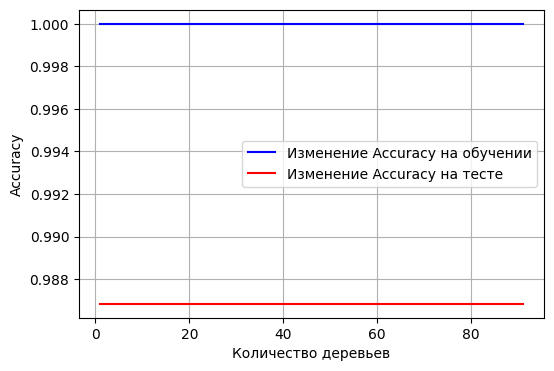

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

acc_train_l = []
acc_test_l = []

for param in np.arange(1, 100, 10):
    gb = GradientBoostingClassifier(n_estimators = param)
    gb.fit(X_train, y_train)
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    acc_train_l.append(acc_train)
    acc_test_l.append(acc_test)

fig = plt.figure(figsize = (6, 4))
plt.plot(np.arange(1, 100, 10), acc_train_l, 'b-', label = "Изменение Accuracy на обучении")
plt.plot(np.arange(1, 100, 10), acc_test_l, 'r-', label = "Изменение Accuracy на тесте")
plt.legend()
plt.xlabel('Количество деревьев')
plt.ylabel('Accuracy')
plt.grid()

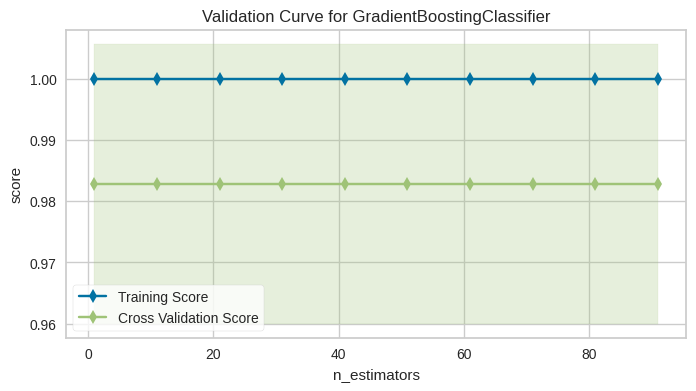

In [33]:
from yellowbrick.model_selection import ValidationCurve

viz_n_est = ValidationCurve(
    GradientBoostingClassifier(random_state = 10),
    param_name = 'n_estimators',
    param_range = np.arange(1, 100, 10),
    cv = 5,
    scoring = 'accuracy',
    size = (800, 400),
    n_jobs = -1
)

viz_n_est.fit(X_train, y_train)
viz_n_est.show();

In [34]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()
param_grid = {'n_estimators': np.arange(10, 100, 10)}
grid_search = GridSearchCV(gb, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

optimal_n_est = grid_search.best_params_['n_estimators']
print(f"Оптимальное значение количества деревьев: {optimal_n_est:.3f}")

Оптимальное значение количества деревьев: 10.000


**learning_rate**


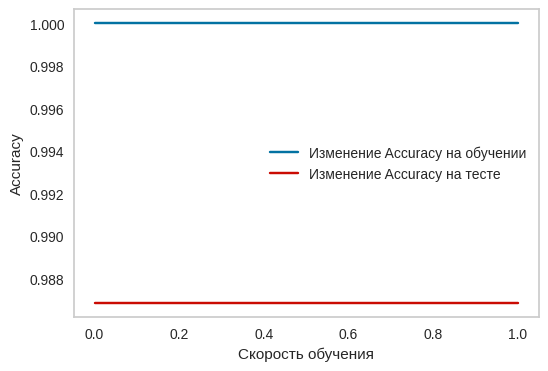

In [39]:
acc_train_l = []
acc_test_l = []

for param in np.arange(0.001, 1.1, 0.1):
    gb = GradientBoostingClassifier(learning_rate = param)
    gb.fit(X_train, y_train)
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    acc_train_l.append(acc_train)
    acc_test_l.append(acc_test)

fig = plt.figure(figsize = (6, 4))
plt.plot(np.arange(0.001, 1.1, 0.1), acc_train_l, 'b-', label = "Изменение Accuracy на обучении")
plt.plot(np.arange(0.001, 1.1, 0.1), acc_test_l, 'r-', label = "Изменение Accuracy на тесте")
plt.legend()
plt.xlabel('Скорость обучения')
plt.ylabel('Accuracy')
plt.grid()

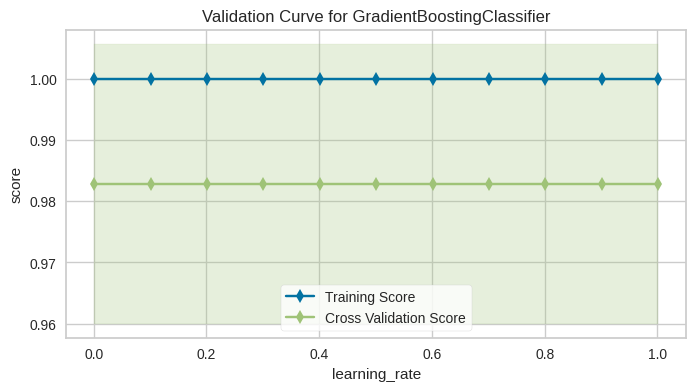

In [36]:
viz_lr = ValidationCurve(
    GradientBoostingClassifier(random_state = 10),
    param_name = 'learning_rate',
    param_range = np.arange(0.001, 1.1, 0.1),
    cv = 5,
    scoring = 'accuracy',
    size = (800, 400),
    n_jobs = -1
)

viz_lr.fit(X_train, y_train)
viz_lr.show();

In [37]:
gb = GradientBoostingClassifier()
param_grid = {'learning_rate': np.arange(0.001, 1.1, 0.1)}
grid_search = GridSearchCV(gb, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

optimal_lr = grid_search.best_params_['learning_rate']
print(f"Оптимальное значение скорости обучения: {optimal_lr:.3f}")

Оптимальное значение скорости обучения: 0.001


**max_depth**

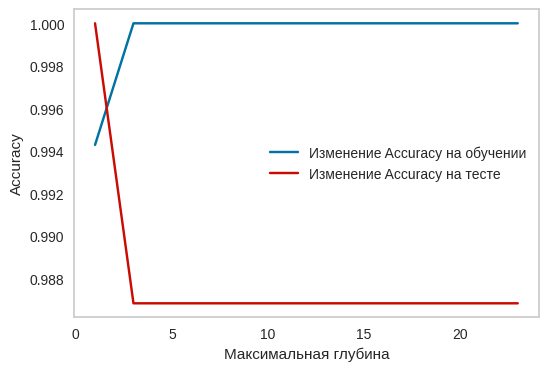

In [38]:
acc_train_l = []
acc_test_l = []

for param in np.arange(1, 25, 2):
    gb = GradientBoostingClassifier(max_depth = param)
    gb.fit(X_train, y_train)
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    acc_train_l.append(acc_train)
    acc_test_l.append(acc_test)

fig = plt.figure(figsize = (6, 4))
plt.plot(np.arange(1, 25, 2), acc_train_l, 'b-', label = "Изменение Accuracy на обучении")
plt.plot(np.arange(1, 25, 2), acc_test_l, 'r-', label = "Изменение Accuracy на тесте")
plt.legend()
plt.xlabel('Максимальная глубина')
plt.ylabel('Accuracy')
plt.grid()

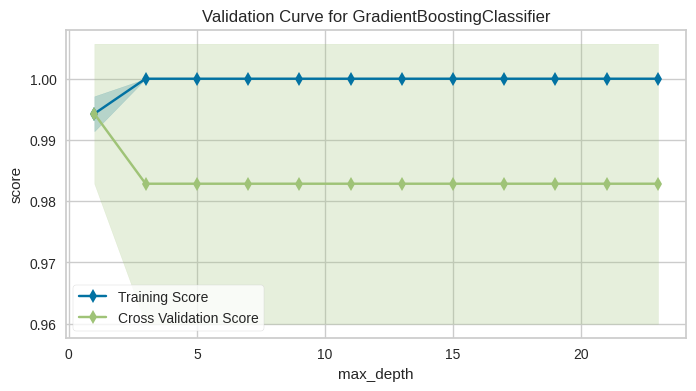

In [40]:
viz_md = ValidationCurve(
    GradientBoostingClassifier(random_state = 10),
    param_name = 'max_depth',
    param_range = np.arange(1, 25, 2),
    cv = 5,
    scoring = 'accuracy',
    size = (800, 400),
    n_jobs = -1
)

viz_md.fit(X_train, y_train)
viz_md.show();

In [42]:
gb = GradientBoostingClassifier()
param_grid = {'max_depth': np.arange(1, 25, 2)}
grid_search = GridSearchCV(gb, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

optimal_md = grid_search.best_params_['max_depth']
print(f"Оптимальное значение глубины дерева: {optimal_md}")

Оптимальное значение глубины дерева: 1


## Обучение модели

Обучить модель с найденными оптимальными значениями гиперпараметров.

In [45]:
gb_f = GradientBoostingClassifier(random_state = 10,
                                  n_estimators = 10,
                                  learning_rate = 0.1,
                                  max_depth = 3)

gb_f.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=10)

Вывести предсказанные вероятности принадлежности объектов к классам.

Вывести предсказанные метки классов.

In [71]:
import pandas as pd
import numpy as np

X_new = np.array([[0.2, -0.4, 0.17, -0.234],
                  [-0.73, 0.21, -0.01, 0.98]])

y_new_proba = gb_f.predict_proba(X_new)

df = pd.DataFrame(X_new, columns=[f'Признак_{i+1}' for i in range(X_new.shape[1])])
df['Class_0_Proba'] = y_new_proba[:, 0]
df['Class_1_Proba'] = y_new_proba[:, 1]
df['Predicted_Class'] = gb_f.predict(X_new)

print("Предсказанные вероятности и метки классов:")
df



Предсказанные вероятности и метки классов:


,Признак_1,Признак_2,Признак_3,Признак_4,Class_0_Proba,Class_1_Proba,Predicted_Class
0,0.20,-0.40,0.17,-0.234,0.614475,0.385525,0
1,-0.73,0.21,-0.01,0.980,0.614475,0.385525,0


## Оценивание качества модели

Построить матрицу ошибок.

In [51]:
y_train_pred = gb_f.predict(X_train)
y_test_pred = gb_f.predict(X_test)

print(f'На обучении: \n {confusion_matrix(y_train, y_train_pred)}')
print(f'На тесте: \n {confusion_matrix(y_test, y_test_pred)}')

На обучении: 
 [[94  0]
 [ 0 81]]
На тесте: 
 [[33  0]
 [ 1 42]]


Вывести отчет о классификации.

In [52]:
print(f'На обучении: \n {classification_report(y_train, y_train_pred)}')
print(f'На тесте: \n {classification_report(y_test, y_test_pred)}')

На обучении: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        81

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

На тесте: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.98      0.99        43

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76

